# Importing Libraries

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("billboard/train_labels.csv")

In [3]:
df.head()

,ID,Labels
0,9c2c67a8bab25b17.jpg,115 91 634 354 billboard 815 371 917 484 billb...
1,bee6a98eeb1ee48e.jpg,276 164 771 735 billboard
2,4ccbcbf33650b75a.jpg,121 267 484 652 billboard
3,b5c6ed3a56eb38c1.jpg,74 451 167 665 billboard 329 240 757 476 billb...
4,00a2d2f1b206b096.jpg,0 599 19 632 billboard 103 599 209 639 billboa...


In [4]:
df['ID'][0]

'9c2c67a8bab25b17.jpg'

In [5]:
path = f"billboard/Images/{df['ID'][0]}"
image1 = cv2.imread(path)

In [6]:
h,w,_ = image1.shape
h,w

(683, 1024)

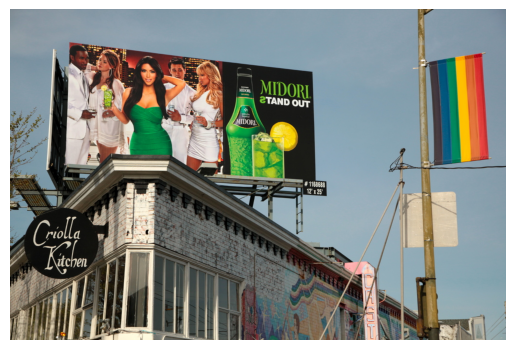

In [7]:
plt.imshow(image1[:,:,::-1]);
plt.axis("off");

In [8]:
rect = image1.copy()
cv2.rectangle(rect,(115,91),(634,354),255,2)
cv2.rectangle(rect,(815,371),(917,484),255,2)
print("done")

done


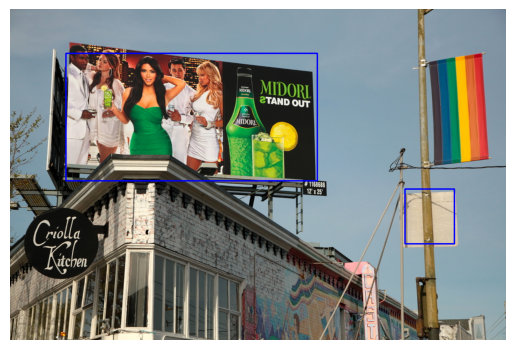

In [9]:
plt.imshow(rect[:,:,::-1]);
plt.axis("off");

# Checking Ratio

In [10]:
football_img = cv2.imread('football/6ty_f_50_we.jpg')

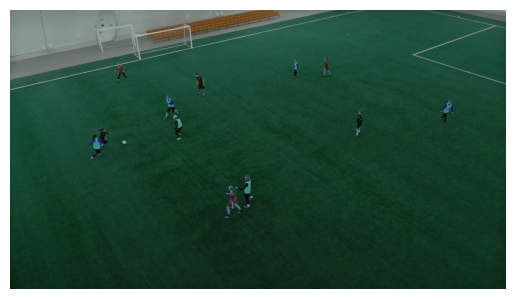

In [11]:
plt.imshow(football_img);
plt.axis('off');

In [12]:
f = open("football/6ty_f_50_we.txt","r")
arr = f.readlines()
arr[len(arr)-1]

'1 0.229818 0.473380 0.010677 0.018981\n'

In [13]:
h,w,_ = football_img.shape

In [14]:
h,w

(2160, 3840)

### Original Box to Yolo Box

In [ ]:
def convert_to_yolo_bbox(bbox, image_width, image_height):
    xmin, ymin, xmax, ymax = bbox
    x_center = (xmin + xmax) / 2
    y_center = (ymin + ymax) / 2
    width = xmax - xmin
    height = ymax - ymin

    # Normalize the values between 0 and 1
    x_center /= image_width
    y_center /= image_height
    width /= image_width
    height /= image_height

    return x_center, y_center, width, height

# Example usage
bbox = (100, 100, 200, 200)
image_width = 800
image_height = 600
yolo_bbox = convert_to_yolo_bbox(bbox, image_width, image_height)
print(yolo_bbox)


### Yolo_box to Original Box

In [18]:
def convert_to_original_bbox(yolo_bbox, image_width, image_height):
    x_center, y_center, width, height = yolo_bbox

    # Denormalize the values
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height

    xmin = int((x_center - width / 2))
    ymin = int((y_center - height / 2))
    xmax = int((x_center + width / 2))
    ymax = int((y_center + height / 2))

    return xmin, ymin, xmax, ymax

In [27]:
x1 = 0.229818
y1 = 0.473380
w_x = 0.010677
h_y = 0.018981
yolo_box = [x1,y1,w_x,h_y]

x1,y1,x2,y2 = convert_to_original_bbox(yolo_box,640,480)
# x1 = int((0.187760) * 640)
# y1 = int((0.453472 ) * 480)
# w_x = int((0.023958 ) * 640)
# h_y = int((0.082870) * 480)

In [28]:
print(x1,y1)
print(x2,y2)

143 222
150 231


In [29]:
rect = football_img.copy()
rect = cv2.resize(rect,(640,480))
cv2.rectangle(rect,(x1,y1),(x2 , y2),(255,0,0),1)
print("done")

done


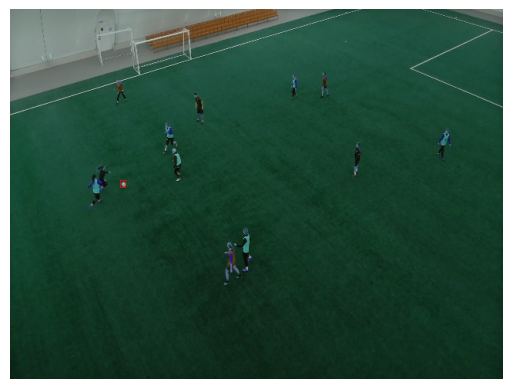

In [30]:
plt.imshow(rect);
plt.axis('off');